### This notebook is for intro Homework 1
The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.Use yellow taxi trip REcords
Site: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page 
file: https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [4]:
## install packages if not installed
!pip install pyarrow

     |████████████████████████████████| 40.8 MB 14.0 MB/s eta 0:00:01


In [3]:
# Q1. Downloading the data
# df= pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet") # 2024 yellow taxi
df_jan = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
df_feb = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-07.parquet")
print(df_jan.head())

## Number of columns in Jan DF
print("columns in JAn df:", len(df_jan.columns))

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [4]:
# Q2 compute the duration variable. standard deviation of the trips duration in January?
df_jan['duration'] = df_jan.tpep_dropoff_datetime-df_jan.tpep_pickup_datetime

df_jan.duration = df_jan.duration.apply(lambda td: td.total_seconds()/60)
df_jan


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

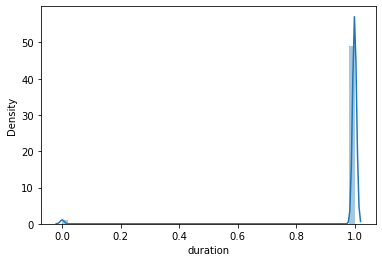

In [38]:
## Visualise distribution of duration

df_jan.duration.describe(percentiles=[0.95, 0.98, 0.99])


sns.distplot((df_jan.duration >=1) & (df_jan.duration <=60))

In [5]:
df_jan.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [6]:
# Q3  Dropping outliers

print(((df_jan.duration >=1) & (df_jan.duration <=60)).mean())

df_jan =df_jan[(df_jan.duration >=1) & (df_jan.duration <=60)]


0.9812202822125979


In [7]:
# Q4 One hot encoding: one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.
    #Turn the dataframe into a list of dictionaries
    #Fit a dictionary vectorizer
    #Get a feature matrix from it
    #What's the dimensionality of this matrix (number of columns)?
    

    
categorical = ['PULocationID', 'DOLocationID']
df_jan[categorical] = df_jan[categorical].astype(str)


train_dicts = df_jan[categorical].to_dict(orient= 'records')
train_dicts

/tmp/ipykernel_66120/1463735589.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan[categorical] = df_jan[categorical].astype(str)


[{'PULocationID': '161', 'DOLocationID': '141'},
 {'PULocationID': '43', 'DOLocationID': '237'},
 {'PULocationID': '48', 'DOLocationID': '238'},
 {'PULocationID': '138', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '79'},
 {'PULocationID': '161', 'DOLocationID': '137'},
 {'PULocationID': '239', 'DOLocationID': '143'},
 {'PULocationID': '142', 'DOLocationID': '200'},
 {'PULocationID': '164', 'DOLocationID': '236'},
 {'PULocationID': '141', 'DOLocationID': '107'},
 {'PULocationID': '234', 'DOLocationID': '68'},
 {'PULocationID': '79', 'DOLocationID': '264'},
 {'PULocationID': '164', 'DOLocationID': '143'},
 {'PULocationID': '138', 'DOLocationID': '33'},
 {'PULocationID': '33', 'DOLocationID': '61'},
 {'PULocationID': '79', 'DOLocationID': '186'},
 {'PULocationID': '90', 'DOLocationID': '48'},
 {'PULocationID': '113', 'DOLocationID': '255'},
 {'PULocationID': '237', 'DOLocationID': '239'},
 {'PULocationID': '143', 'DOLocationID': '229'},
 {'PULocationID': '137', 'DOLocat

In [8]:
## vectoriser
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
#dv.feature_names_
target = 'duration'
y_train= df_jan[target].values

In [9]:
X_train
#y_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [10]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [11]:
## Q5 Train model -> RMSE
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
## Apply Model
y_pred = lr.predict(X_train)
y_pred

array([11.52727631, 10.89774082, 11.32573217, ..., 11.73764853,
       12.70527512, 11.54225863])

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


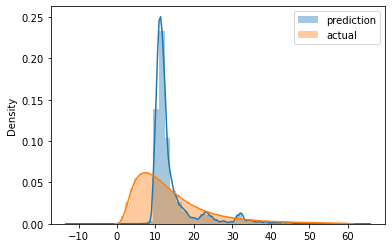

In [13]:
## visualise
sns.distplot(y_pred, label="prediction")
sns.distplot(y_train, label="actual")
plt.legend()

In [14]:
## Q5 RMSE
mean_squared_error(y_train, y_pred, squared=False)


7.649261027792376

In [16]:
# Q6 RMSE on validation Feb Dataset
df_feb['duration'] = df_feb.tpep_dropoff_datetime-df_feb.tpep_pickup_datetime ## calculate duration
df_feb.duration = df_feb.duration.apply(lambda td: td.total_seconds()/60)

df_feb =df_feb[(df_feb.duration >=1) & (df_feb.duration <=60)] ## remove outliers

categorical = ['PULocationID', 'DOLocationID']
df_feb[categorical] = df_feb[categorical].astype(str)

train_dicts = df_feb[categorical].to_dict(orient= 'records')

## train
dv = DictVectorizer() ## vectoriser
X_train = dv.fit_transform(train_dicts)
#dv.feature_names_
target = 'duration'
y_train= df_feb[target].values


## model
lr= LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_train) ## Apply Model

mean_squared_error(y_train, y_pred, squared=False)

8.352340012444278

In [19]:
## save model
import pickle
with open('lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)